In [1]:
## python files that contain the functions to aquire and prep the data located in my git repository 
import wrangle
import explore
import model
import pandas as pd
import numpy as np
import env

# import python libraries for effectivness
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
import math

# scikit learn for effectivness
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE


#visulization settings to make things look pretty
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

#warnings
import warnings
warnings.filterwarnings("ignore")

#### Joseph Goerner
#### June 13 2022


<img src="Old_Man_Z.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

# <span style="color:black;"> Regression Analysis, Great for Hair lines. Horrible for Realestate. : Zillow </span>


# <span style="color:orange;"> Goals </span>
* Construct an ML Regression model that predict propery tax assessed values ('taxvaluedollarcnt') of Single Family Properties using attributes of the properties from the year 2017
* Find the key drivers of property value for single family properties. what are the most profitable aminites to have a bedroom or bathroom. and what does that have to do with value.
* Deliver a report and recomendations to Zillow executives with further recomendations on what to do next.
* Fix Zacks mistake and recover the FIPS numbers

## <span style="color:orange;"> Acquire </span>
- Zillow data was queried from Codeup mysql database using the env file credentials

## <span style="color:orange;"> Plan </span>
* acquire the data with sql
* clean/prep the data
* explore features of data
* model data
* evaluate data

# <span style="color:orange;"> Executive Summary </span>
* In this presention I will attack and perform a heavy proccess of regression analysis on the tax assesed values from the year of 2017, to predict future tax values. I will also be searching for the key drives of property value, that turned out to be bathrooms and sqr feet and county that the house was located in. I created a ols regressor model with a 30% effective over my baseline so I as a data scientist would recommend further analysis with my model.
* Final RMSE of 200650 

## <span style="color:orange;"> FIPS </span>
* Los Angeles County, California (6037)
* Orange County, California (6059)
* Ventura County, California (6111)
* Mean tax rate of Los Angeles County is 1.38 %
* Mean tax rate of Orange County is 1.21 %
* Mean tax rate of Ventura County is 1.20 %

# <span style="color:orange;"> Hypotheses </span>
1.  There is not a linear correlation between square footage of home and tax value.
2.  There is not a linear correlation between bedrooms and tax value.
3.  There is not a linear correlation between bathrooms and tax value.
4.  there is no linear correlation between county and tax value

### Data Summary

In [2]:
df = wrangle.clean_zillow(wrangle.get_zillow_data())

In [3]:
df.head()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
parcelid,,,,,,,,,,,,,
14297519,4,3.5,1998,1286,96978,6059,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
17052889,2,1.0,1967,2061,97099,6111,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
14186244,3,2.0,1962,1286,97078,6059,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
12177905,4,3.0,1970,3101,96330,6037,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
10887214,3,3.0,1964,3101,96451,6037,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77253 non-null  int64  
 1   bathrooms     77253 non-null  float64
 2   yearbuilt     77253 non-null  int64  
 3   county        77253 non-null  int64  
 4   zip_code      77253 non-null  int64  
 5   fips          77253 non-null  int64  
 6   latitude      77253 non-null  int64  
 7   longitude     77253 non-null  int64  
 8   square_feet   77253 non-null  float64
 9   taxamount     77253 non-null  float64
 10  tax_value     77253 non-null  float64
 11  property_age  77253 non-null  int64  
 12  tax_rate      77253 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 8.3 MB


## <span style="color:orange;"> Additional Info (outside of the model) </span>

- states and counties the properties are located in


### States and Counties of Properties

In [5]:
df.fips.value_counts()

6037    50555
6059    20507
6111     6191
Name: fips, dtype: int64

In [6]:
df.fips.value_counts(normalize=True)

6037    0.654408
6059    0.265452
6111    0.080139
Name: fips, dtype: float64

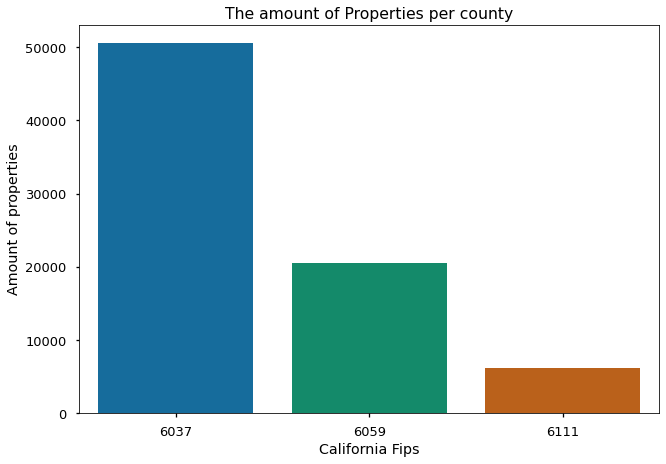

In [7]:
plt.title('The amount of Properties per county')
sns.countplot(df.fips)
plt.xlabel('California Fips')
plt.ylabel('Amount of properties')
plt.show()

In [8]:
#Change the names in the fips so we know the cat and also so we can see supply and damand 
df.rename(columns={"fips": "ca_county"}, inplace=True)


In [9]:
df['ca_county'] = df['ca_county'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})


In [10]:
df.ca_county.value_counts()

Los Angeles    50555
Orange         20507
Ventura         6191
Name: ca_county, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77253 non-null  int64  
 1   bathrooms     77253 non-null  float64
 2   yearbuilt     77253 non-null  int64  
 3   county        77253 non-null  int64  
 4   zip_code      77253 non-null  int64  
 5   ca_county     77253 non-null  object 
 6   latitude      77253 non-null  int64  
 7   longitude     77253 non-null  int64  
 8   square_feet   77253 non-null  float64
 9   taxamount     77253 non-null  float64
 10  tax_value     77253 non-null  float64
 11  property_age  77253 non-null  int64  
 12  tax_rate      77253 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 10.3+ MB


In [12]:
tax_rates = df.groupby("ca_county").tax_rate.mean()
tax_rates 


ca_county
Los Angeles    0.013768
Orange         0.012064
Ventura        0.011912
Name: tax_rate, dtype: float64

# <span style="color:orange;"> Prepare </span>

## The Search for Outliers, we will be dropping yearbuilt, county, zip_code, ca_county, latitude, longitude, taxamount, and property age. I will only search for what i think has outliers .

In [13]:
mvp = df.copy()

In [14]:
mvp.drop(['yearbuilt', 'zip_code', 'ca_county', 'latitude','longitude', 'taxamount', 'property_age', 'tax_rate'], axis=1, inplace=True)


In [15]:
mvp.head()

,bedrooms,bathrooms,county,square_feet,tax_value
parcelid,,,,,
14297519,4,3.5,1286,3100.0,1023282.0
17052889,2,1.0,2061,1465.0,464000.0
14186244,3,2.0,1286,1243.0,564778.0
12177905,4,3.0,3101,2376.0,145143.0
10887214,3,3.0,3101,1312.0,119407.0


In [16]:
mvp.describe()

,bedrooms,bathrooms,county,square_feet,tax_value
count,77253.00000,77253.000000,77253.000000,77253.000000,7.725300e+04
mean,3.06115,2.304254,2535.858905,1784.127568,4.886524e+05
std,1.12984,0.990168,801.100915,953.267975,6.499134e+05
min,0.00000,0.000000,1286.000000,128.000000,1.000000e+03
25%,2.00000,2.000000,1286.000000,1182.000000,2.070000e+05
50%,3.00000,2.000000,3101.000000,1541.000000,3.587690e+05
75%,4.00000,3.000000,3101.000000,2110.000000,5.685390e+05
max,16.00000,18.000000,3101.000000,35640.000000,4.906124e+07


In [17]:
mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     77253 non-null  int64  
 1   bathrooms    77253 non-null  float64
 2   county       77253 non-null  int64  
 3   square_feet  77253 non-null  float64
 4   tax_value    77253 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.6 MB


In [18]:
mvp.shape

(77253, 5)

In [19]:
#bedroom value counts
mvp.bedrooms.value_counts()

3     30406
2     19196
4     17524
5      4540
1      3381
6       996
0       625
8       250
7       206
9        69
10       31
12       16
11        9
13        2
14        1
16        1
Name: bedrooms, dtype: int64

In [20]:
#bathroom value counts
mvp.bathrooms.value_counts()

2.0     31546
3.0     17329
1.0     12924
2.5      6601
4.0      3344
1.5      1416
3.5      1030
5.0      1021
4.5       691
6.0       418
0.0       387
5.5       224
7.0       114
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
11.0        3
8.5         2
18.0        1
13.0        1
Name: bathrooms, dtype: int64

In [21]:
#square feet value counts
mvp.square_feet.value_counts()


1200.0    182
1120.0    169
1440.0    148
1080.0    133
1260.0    121
         ... 
5271.0      1
4129.0      1
5218.0      1
5019.0      1
5210.0      1
Name: square_feet, Length: 4967, dtype: int64

In [22]:
#tax value value counts
mvp.tax_value.value_counts()

400000.0    55
600000.0    50
350000.0    49
450000.0    45
420000.0    44
            ..
249272.0     1
104207.0     1
368769.0     1
257367.0     1
49546.0      1
Name: tax_value, Length: 50732, dtype: int64

In [23]:
mvp.county.value_counts()

3101    50555
1286    20507
2061     6191
Name: county, dtype: int64

# Data Summary Targets
- tax_value, square_feet, bathrooms, and bedrooms all have outliers and we need to hunt those down. 
- One of the biggest outliers is that of the really wealthy expensive properties. 

# <span style="color:orange;"> Acquire and Prepare Summary </span>
- renamed cat for ease and effect of reader and writer (you and me)
- Changed all data types to int except parcelid, bathrooms, tax_value, square_feet, and fips
- Two new columns made: property_age and tax_rate, since I will primarly be using these for my search and ease
- Nulls dropped 

## Visualize 

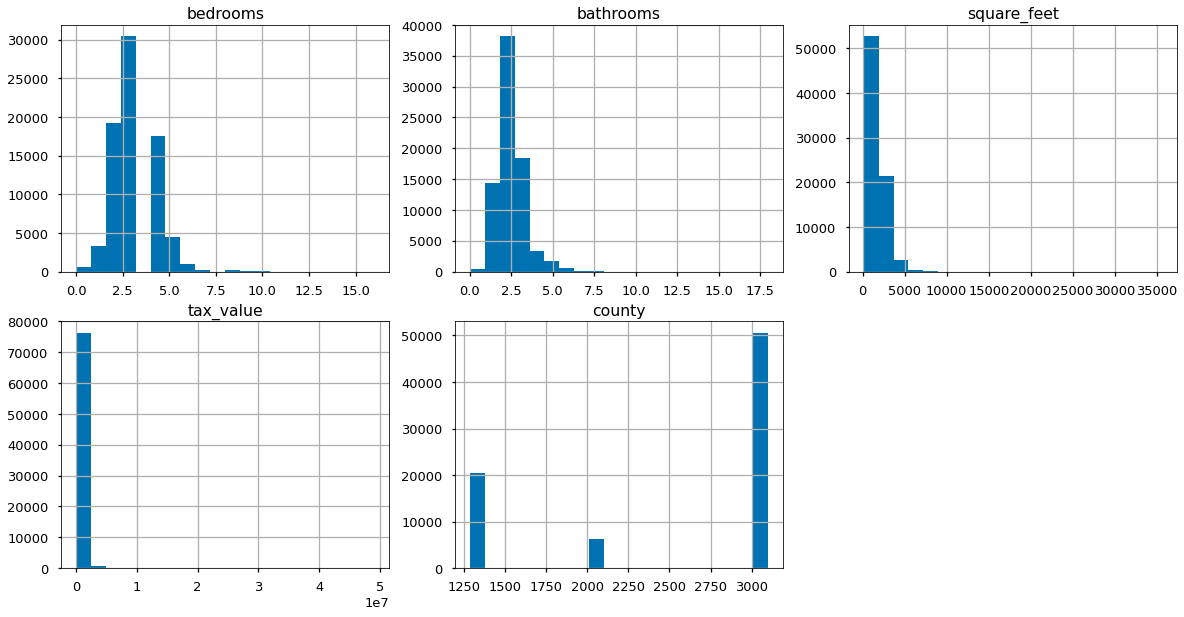

In [24]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'county']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(2,3, plot_number)
    plt.title(col)
    series.hist(bins=20)

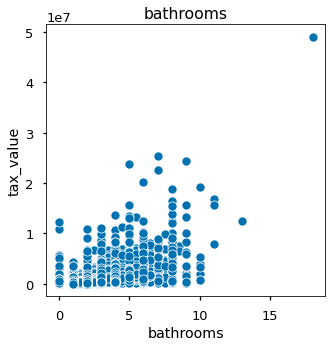

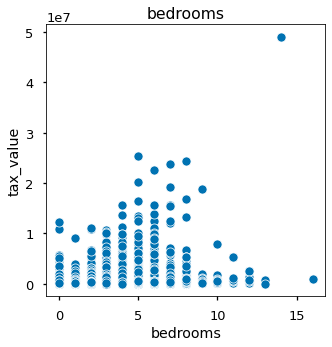

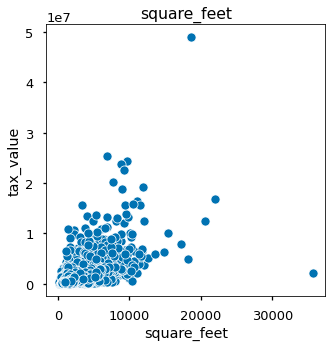

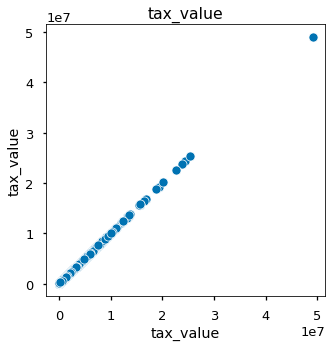

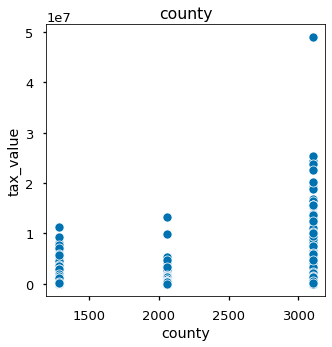

In [25]:
columns = ['bathrooms', 'bedrooms', 'square_feet', 'tax_value', 'county']

# loop through the columns and create a scatter plot for each feature and target pair
for col in columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=df, x=col, y='tax_value')
    plt.title(col)

# Plot Takeaways:
- Bedrooms distribution is the closest to being normally distributed meaning less of a corillation to tax value
- Bathrooms distribution is skewed to the right giving me the hint that is worth checking out 
- There are outliers in tax_value and sqr_feet making some of the data skewed  


# <span style="color:orange;"> Explore </span>

## Split:
- Data is split into train, validate, and test zillow dataframe

In [46]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test_split(mvp,'tax_value', 123)

In [47]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (43261, 5)
validate -> (18541, 5)
test -> (15451, 5)


In [48]:
train.head()

,bedrooms,bathrooms,county,square_feet,tax_value
parcelid,,,,,
17228134,3,2.0,2061,1888.0,246735.0
11357458,3,2.0,3101,1484.0,149689.0
17153382,2,2.0,2061,1937.0,540544.0
14682419,3,3.0,1286,1526.0,630000.0
10914366,2,2.0,3101,1114.0,460475.0


# Scale:
### The point is to normalize the numbers 

In [49]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Standard_Scaler(X_train, X_validate, X_test)

In [50]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled

(StandardScaler(),
           bedrooms  bathrooms    county  square_feet
 parcelid                                            
 17228134 -0.057485  -0.308101 -0.592024     0.108099
 11357458 -0.057485  -0.308101  0.705498    -0.317575
 17153382 -0.942493  -0.308101 -0.592024     0.159728
 14682419 -0.057485   0.701348 -1.558926    -0.273322
 10914366 -0.942493  -0.308101  0.705498    -0.707425
 ...            ...        ...       ...          ...
 11644337 -0.057485   1.710797  0.705498     2.778042
 13926156 -0.057485  -0.308101 -1.558926     0.561167
 14306263 -0.057485  -0.308101 -1.558926    -0.260678
 14654702 -0.942493  -0.308101 -1.558926    -0.417671
 11119353  0.827522   0.701348  0.705498     0.300916
 
 [43261 rows x 4 columns],
           bedrooms  bathrooms    county  square_feet
 parcelid                                            
 12698037 -0.057485  -0.308101  0.705498    -0.258571
 14115188 -0.057485  -0.308101 -1.558926    -0.460871
 10783555  0.827522  -0.308101  0.

In [51]:
X_train_scaled.head()

,bedrooms,bathrooms,county,square_feet
parcelid,,,,
17228134,-0.057485,-0.308101,-0.592024,0.108099
11357458,-0.057485,-0.308101,0.705498,-0.317575
17153382,-0.942493,-0.308101,-0.592024,0.159728
14682419,-0.057485,0.701348,-1.558926,-0.273322
10914366,-0.942493,-0.308101,0.705498,-0.707425


In [52]:
# categorical and quantitative variables
cat_vars = []
quant_vars = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'county']

# Correlation Heatmap Takeaways:
- the larger correlations seem to be between bathrooms and square feet and between bathrooms and bedrooms

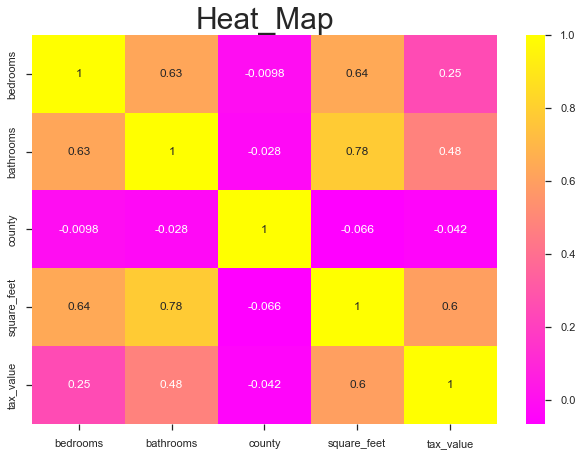

In [53]:
sns.heatmap(train.corr(), cmap='spring', annot=True)
plt.title('Heat_Map', fontsize = 30)
plt.show()

# Statistical Tests
- Correlation tests

In [54]:
#set confidence interval and alpha before the test
conf_interval = .90 # desired confidence interval
alpha = 0.5 - conf_interval

  # <span style="color:orange;"> TEST 1: </span>
- **Null Hypothesis (HO)** =  no linear correlation between the square footage of a home and tax value
- **Alternative Hypothesis (HA)** =  a linear correlation between the square footage of a home and tax value


In [55]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.square_feet, train.tax_value)
corr, p

(0.5965308278054859, 0.0)

In [56]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is greater than alpha: -0.4
We fail to reject the null hypothesis because there is no significant correlation present


# <span style="color:orange;"> TEST 2: </span>
- **Null Hypothesis (HO)** = there is no linear correlation between the square footage of a home and bathroom count
- **Alternative Hypothesis (HA)** = there is a linear correlation between the square footage of a home and bathroom count


In [57]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bathrooms, train.tax_value)
corr, p

(0.4763714031851665, 0.0)

In [58]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is greater than alpha: -0.4
We fail to reject the null hypothesis because there is no significant correlation present


# <span style="color:orange;"> TEST 3: </span>
- **Null Hypothesis (HO)** = there is no linear correlation between the square footage of a home and bedroom count
- **Alternative Hypothesis (HA)** = there is a linear correlation between the square footage of a home and bedroom count

In [59]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bedrooms, train.tax_value)
corr, p

(0.2472029478632276, 0.0)

In [60]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is greater than alpha: -0.4
We fail to reject the null hypothesis because there is no significant correlation present


# <span style="color:orange;"> TEST 4: </span>
- **Null Hypothesis (HO)** = there is no linear correlation between county and tax value
- **Alternative Hypothesis (HA)** = there is a linear correlation between county and tax value


In [61]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.county, train.tax_value)
corr, p

(-0.04234028123228207, 1.2495703698149333e-18)

In [62]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 1.2495703698149333e-18 is greater than alpha: -0.4
We fail to reject the null hypothesis because there is no significant correlation present


# <span style="color:orange;"> Model </span>

In [63]:
X_train_scaled.head()

,bedrooms,bathrooms,county,square_feet
parcelid,,,,
17228134,-0.057485,-0.308101,-0.592024,0.108099
11357458,-0.057485,-0.308101,0.705498,-0.317575
17153382,-0.942493,-0.308101,-0.592024,0.159728
14682419,-0.057485,0.701348,-1.558926,-0.273322
10914366,-0.942493,-0.308101,0.705498,-0.707425


In [64]:
y_train 

parcelid
17228134     246735.0
11357458     149689.0
17153382     540544.0
14682419     630000.0
10914366     460475.0
              ...    
11644337    2101164.0
13926156     258508.0
14306263     718578.0
14654702     153369.0
11119353     499747.0
Name: tax_value, Length: 43261, dtype: float64

In [65]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape

((43261, 4),
 (43261, 4),
 (43261,),
 (18541, 4),
 (18541, 4),
 (18541,),
 (15451, 4),
 (15451, 4),
 (15451,))

In [66]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [67]:
y_train.head()

,tax_value
parcelid,
17228134,246735.0
11357458,149689.0
17153382,540544.0
14682419,630000.0
10914366,460475.0


# <span style="color:orange;"> Baseline </span>

In [68]:
# predict the median for ytrain and yvalidate
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median
#predict the mean for ytrain and yvalidate
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

In [69]:
y_train.head()

,tax_value,baseline_median,baseline_mean
parcelid,,,
17228134,246735.0,357343.0,489747.322901
11357458,149689.0,357343.0,489747.322901
17153382,540544.0,357343.0,489747.322901
14682419,630000.0,357343.0,489747.322901
10914366,460475.0,357343.0,489747.322901


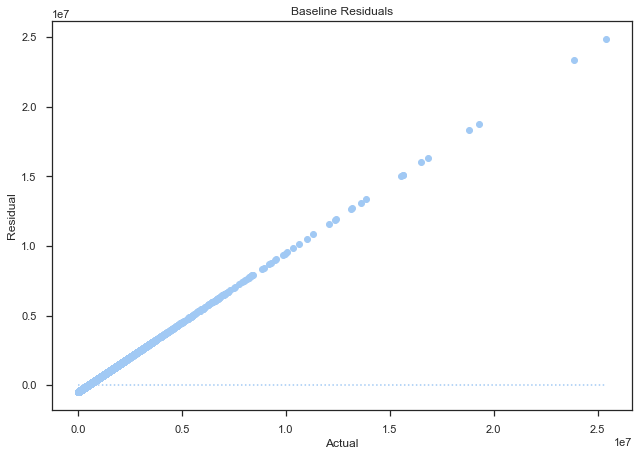

In [70]:
model.plot_residuals(y_train.tax_value, y_train.baseline_mean)

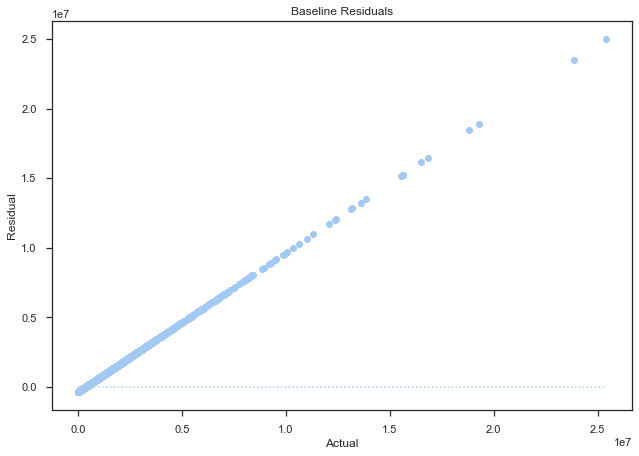

In [71]:
model.plot_residuals(y_train.tax_value, y_train.baseline_median,)

In [72]:
#Evaluate the baseline model using the mean
model.baseline_mean_errors(y_train.tax_value)

{'sse': 1.78553405220765e+16,
 'mse': 412735270152.7126,
 'rmse': 642444.7603901152}

In [73]:
#Evaluate the baseline model using the median
model.baseline_median_errors(y_train.tax_value)

{'sse': 1.8613744991287336e+16,
 'mse': 430266174875.4614,
 'rmse': 655946.7774716646}

In [74]:
# RMSE of pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  642444.76 
Validate/Out-of-Sample:  724108.89
RMSE using Median
Train/In-Sample:  655946.78 
Validate/Out-of-Sample:  736290.58


In [75]:
#going to use median

## Modeling

In [76]:
X_train_scaled.head()

,bedrooms,bathrooms,county,square_feet
parcelid,,,,
17228134,-0.057485,-0.308101,-0.592024,0.108099
11357458,-0.057485,-0.308101,0.705498,-0.317575
17153382,-0.942493,-0.308101,-0.592024,0.159728
14682419,-0.057485,0.701348,-1.558926,-0.273322
10914366,-0.942493,-0.308101,0.705498,-0.707425


In [77]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value,baseline_median,baseline_mean
parcelid,,,
17228134,246735.0,357343.0,489747.322901
11357458,149689.0,357343.0,489747.322901
17153382,540544.0,357343.0,489747.322901
14682419,630000.0,357343.0,489747.322901
10914366,460475.0,357343.0,489747.322901


### Baseline


In [78]:
# predict the median for ytrain and yvalidate
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median
#predict the mean for ytrain and yvalidate
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

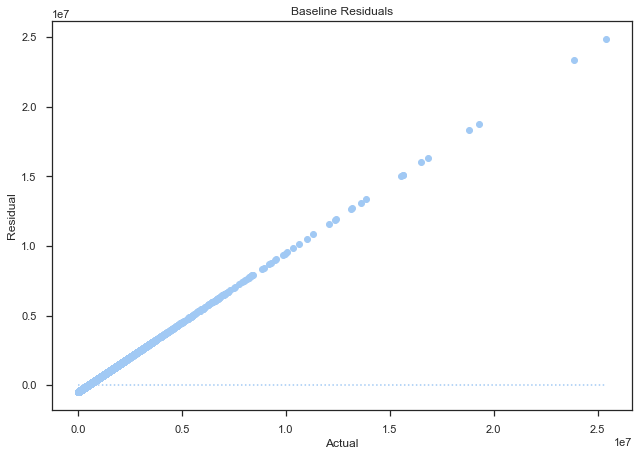

In [79]:

model.plot_residuals(y_train.tax_value, y_train.baseline_mean)

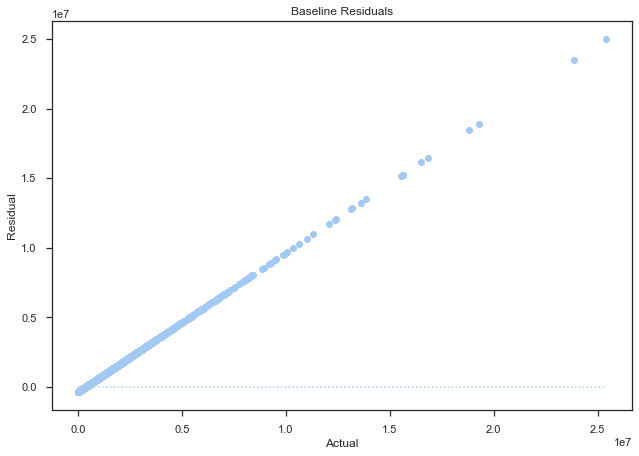

In [80]:
model.plot_residuals(y_train.tax_value, y_train.baseline_median)

In [81]:
#Evaluate the baseline model using the mean
model.baseline_mean_errors(y_train.tax_value)



{'sse': 1.78553405220765e+16,
 'mse': 412735270152.7126,
 'rmse': 642444.7603901152}

In [82]:
#Evaluate the baseline model using the median
model.baseline_median_errors(y_train.tax_value)

{'sse': 1.8613744991287336e+16,
 'mse': 430266174875.4614,
 'rmse': 655946.7774716646}

In [83]:
# RMSE of pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  642444.76 
Validate/Out-of-Sample:  724108.89


In [84]:
#RMSE of pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  655946.78 
Validate/Out-of-Sample:  736290.58


In [85]:
#going to use mean


# Train and Validate

### Linear Regression OLS

In [86]:
#make the thing
lm = LinearRegression(normalize=True)
#fit the thing
#only fit on training
lm.fit(X_train, y_train.tax_value)
#use the thing
y_train['pred_lm'] = lm.predict(X_train)
y_train.head()

rmse_train_lm = mean_squared_error(y_train.tax_value, y_train.pred_lm)**(0.5)
# predict validate
y_validate['pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.tax_value, y_validate.pred_lm)**(0.5)

### Lasso Lars

In [87]:
#make the thing
lars = LassoLars(alpha=1.0)
#fit the thing
lars.fit(X_train, y_train.tax_value)
#predict the thing: train
y_train['pred_lars'] = lars.predict(X_train)
# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.tax_value, y_train.pred_lars)**(0.5)
# predict the thing: validate
y_validate['pred_lars'] = lars.predict(X_validate)
# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.tax_value, y_validate.pred_lars)**(0.5)

### Tweedie Regressor

In [88]:
#make the thing
glm = TweedieRegressor(power= 3, alpha=0)
#fit the thing 
glm.fit(X_train, y_train.tax_value)
#predict the thing: train
y_train['pred_glm'] = glm.predict(X_train)
# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.tax_value, y_train.pred_glm)**(0.5)
#predict the thing: validate
# predict validate
y_validate['pred_glm'] = glm.predict(X_validate)
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.pred_glm)**(0.5)

### Polynomial Regression

In [89]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.pred_lm2)**(0.5)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.pred_lm2)**(0.5)

In [90]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=3 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: {round(rmse_train_lm2, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}

''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 655946.78
Validate/Out-of-Sample: 736290.58
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 501692.56
Validation/Out-of-Sample: 593431.11
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 501692.89
Validation/Out-of-Sample: 593425.39
------------------------------------
RMSE for GLM using Tweedie, power=3 & alpha=0:

Training/In-Sample: 642444.76
Validation/Out-of-Sample: 724108.89
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: 478212.26
Validation/Out-of-Sample: 530931.88




## Evaluate

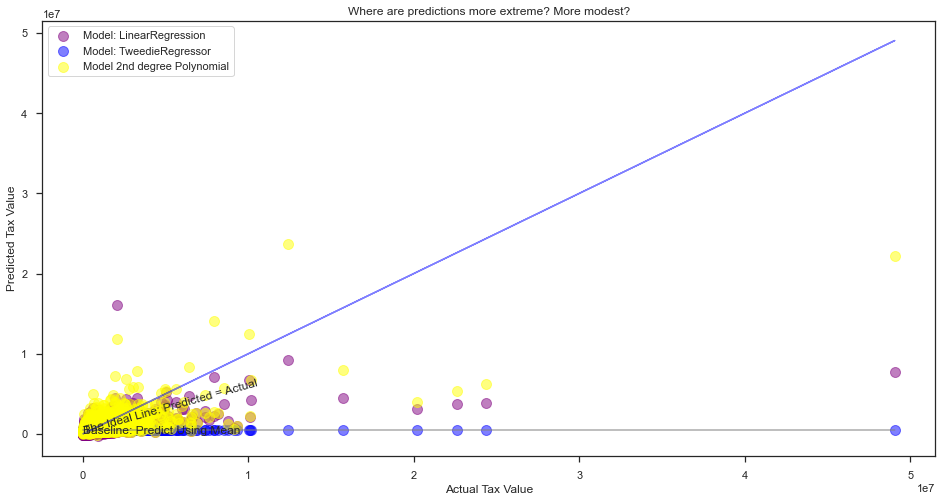

In [91]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.pred_lm, 
            alpha=.5, color="purple", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.pred_glm, 
            alpha=.5, color="blue", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [92]:
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline_median)}])



In [93]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)

In [94]:
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lars)}, ignore_index=True)

In [95]:
metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_glm)}, ignore_index=True)

In [96]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm2)}, ignore_index=True)

In [97]:
metric_df   

,model,RMSE_validate,r^2_validate
0,median_baseline,736290.584878,0.000000
1,OLS Regressor,593431.112189,0.328370
2,Lasso alpha 1,593425.386152,0.328383
3,GLS (Poisson),724108.894367,0.000000
4,Quadratic Model,530931.876378,0.462393


# Test

In [98]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_lm'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.pred_lm)**(0.5)

print(f"""
RMSE for OLS Regressor,:
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for OLS Regressor,:
    
Test/Out-of-Sample Performance: 433146.4325782274



 # <span style="color:orange;"> THIS IS THE MVP </span>
- the best model was the OLS Regressor model with r^2 of 0.32, so we will continue with this model, The Quadratic model did better so you can tell there was alot of noise and I would like to see if i can work with it a little more. 

## Acquire Even More Data for Model

In [99]:
df = wrangle.clean_zillow(wrangle.get_zillow_data())

In [100]:
#handle outliers
columns = ['bedrooms', 'bathrooms','square_feet', 'tax_value']
for x in columns:
    
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = (Q3 - Q1) * 1.5
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df = df[df[x] < (upper)]
    
    print('column:', x,'\nIQR:', IQR, '\nUpper bound:', upper, '\nLower bound:', lower, '\n')



column: bedrooms 
IQR: 3.0 
Upper bound: 8.5 
Lower bound: -2.5 

column: bathrooms 
IQR: 1.5 
Upper bound: 5.25 
Lower bound: -0.25 

column: square_feet 
IQR: 1350.0 
Upper bound: 4102.0 
Lower bound: -848.0 

column: tax_value 
IQR: 514925.25 
Upper bound: 1318084.875 
Lower bound: -569974.375 



In [101]:
# dropped for this iteration of final modeling
df.drop(['county', 'zip_code', 'latitude', 'longitude', 'taxamount'], axis=1, inplace=True)

In [102]:
# fips to object 
df['fips'] = df['fips'].astype(object)

# Explore

In [103]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test_split(df,'tax_value', 123)

In [104]:
train.head()

,bedrooms,bathrooms,yearbuilt,fips,square_feet,tax_value,property_age,tax_rate
parcelid,,,,,,,,
12815320,5,4.0,1983,6037,3490.0,581233.0,38,0.011875
11490249,2,3.0,1980,6037,1387.0,575755.0,41,0.011870
11695472,1,1.0,1921,6037,900.0,137258.0,100,0.012332
12960692,3,3.0,1983,6037,1469.0,437512.0,38,0.013344
13057060,4,3.0,2003,6037,2481.0,646000.0,18,0.014325


In [105]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (40674, 8)
validate -> (17432, 8)
test -> (14527, 8)


# Scale

In [106]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Standard_Scaler(X_train, X_validate, X_test)

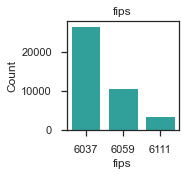

      fips  Count  Percent
6037  6037  26574    65.33
6059  6059  10700    26.31
6111  6111   3400     8.36
_________________________________________________________________


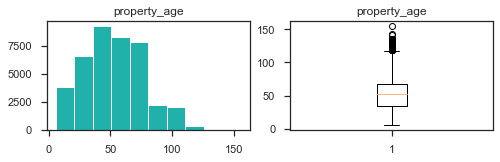

count    40674.000000
mean        52.788022
std         23.358785
min          6.000000
25%         35.000000
50%         52.000000
75%         68.000000
max        155.000000
Name: property_age, dtype: float64


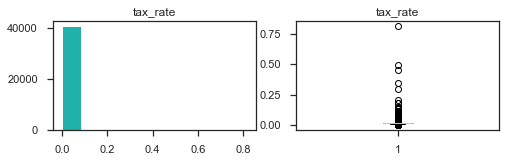

count    40674.000000
mean         0.013261
std          0.006903
min          0.000094
25%          0.011721
50%          0.012332
75%          0.013549
max          0.816490
Name: tax_rate, dtype: float64


In [107]:
cat_vars = ['fips']
quant_vars = ['property_age', 'tax_rate']
explore.explore_univariate(train, cat_vars, quant_vars)

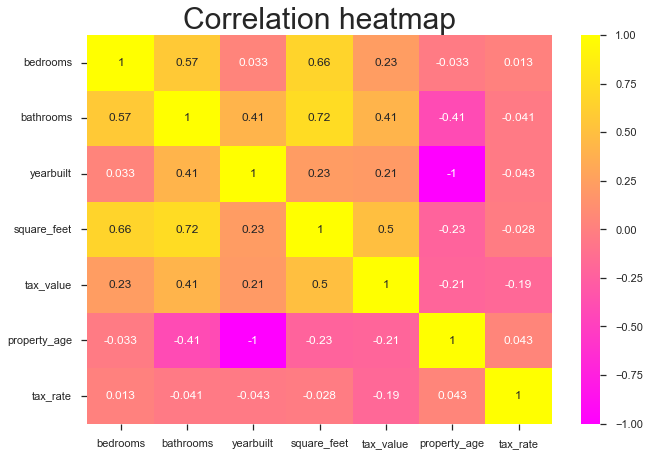

In [108]:
sns.heatmap(train.corr(), cmap='spring', annot=True)
plt.title('Correlation heatmap', fontsize = 30)
plt.show()

## Heatmap Takeaways:
- square feet has the biggest correlations with bedrooms and bathrooms adding to the feature of tax value
- small correlation between tax_value and year built on the Correlation heatmap

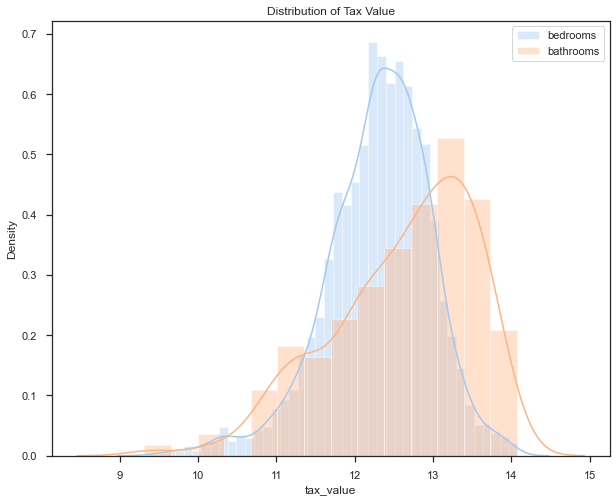

In [109]:
bedrooms = df.loc[df['bathrooms'] == False]
bathrooms = df.loc[df['bedrooms'] == True]

plt.figure(figsize=(10,8))
sns.distplot(np.log(bathrooms['tax_value' ]), label='bedrooms')
sns.distplot(np.log(bedrooms['tax_value']), label='bathrooms')
plt.title('Distribution of Tax Value')
plt.legend()
plt.show()

#  Feature Engineering

In [110]:
def select_kbest(x, y, k):
    
    # parameters: f_regression stats test, give me  features
    f_selector = SelectKBest(f_regression, k=k)
    
    # find the top  X's correlated with y
    f_selector.fit(X_train_scaled, y_train)
    
    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()
    
    f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

In [111]:
select_kbest(X_train_scaled,'tax_value', 3 )

['bedrooms', 'bathrooms', 'square_feet']

# Modeling

In [112]:
X_train_scaled.head()

,bedrooms,bathrooms,yearbuilt,fips,square_feet,property_age,tax_rate
parcelid,,,,,,,
12815320,1.940945,2.247747,0.633090,-0.569695,2.709664,-0.633090,-0.200767
11490249,-0.944719,1.007104,0.504657,-0.569695,-0.387675,-0.504657,-0.201466
11695472,-1.906607,-1.474183,-2.021191,-0.569695,-1.104937,2.021191,-0.134502
12960692,0.017169,1.007104,0.633090,-0.569695,-0.266903,-0.633090,0.012039
13057060,0.979057,1.007104,1.489309,-0.569695,1.223589,-1.489309,0.154154


In [113]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
parcelid,
12815320,581233.0
11490249,575755.0
11695472,137258.0
12960692,437512.0
13057060,646000.0


# New Baseline

In [114]:
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

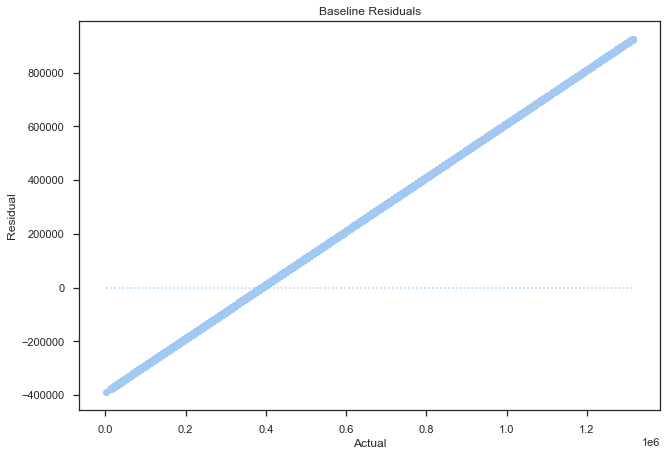

In [115]:
model.plot_residuals(y_train.tax_value, y_train.baseline_mean)

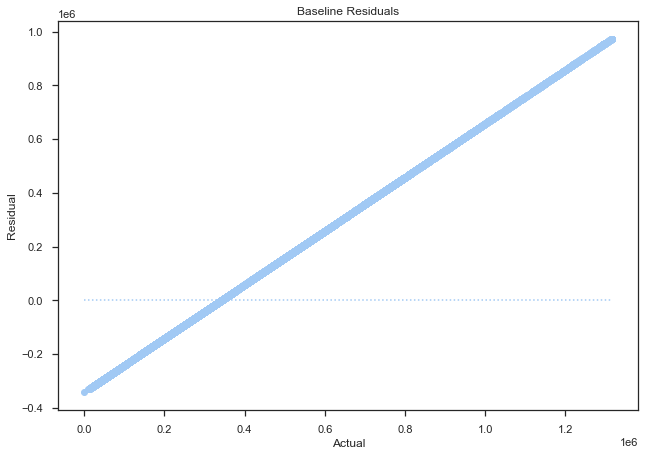

In [116]:
model.plot_residuals(y_train.tax_value, y_train.baseline_median)

In [117]:
model.baseline_mean_errors(y_train.tax_value)

{'sse': 2669874206269131.0,
 'mse': 65640807549.51888,
 'rmse': 256204.62046871614}

In [118]:
model.baseline_median_errors(y_train.tax_value)

{'sse': 2762248820911300.5,
 'mse': 67911904924.79964,
 'rmse': 260599.1268688359}

# RMSE of the mean

In [119]:
# mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  256204.62 
Validate/Out-of-Sample:  256297.67


In [120]:
# meadian
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  260599.13 
Validate/Out-of-Sample:  260371.98


## I am going to use the mean 

# Train and Validation 

### Linear Regression OLS

In [121]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train.tax_value)
y_train['pred_lm'] = lm.predict(X_train)
y_train.head()

rmse_train_lm = mean_squared_error(y_train.tax_value, y_train.pred_lm)**(0.5)
# predict validate
y_validate['pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.tax_value, y_validate.pred_lm)**(0.5)

### Lasso Lars

In [122]:

lars = LassoLars(alpha=1.0)
lars.fit(X_train, y_train.tax_value)
y_train['pred_lars'] = lars.predict(X_train)
rmse_train_lars = mean_squared_error(y_train.tax_value, y_train.pred_lars)**(0.5)
y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate_lars = mean_squared_error(y_validate.tax_value, y_validate.pred_lars)**(0.5)

### Tweedie Regressor

In [123]:
glm = TweedieRegressor(power=3, alpha=0)
glm.fit(X_train, y_train.tax_value)
y_train['pred_glm'] = glm.predict(X_train)
rmse_train_glm = mean_squared_error(y_train.tax_value, y_train.pred_glm)**(0.5)
y_validate['pred_glm'] = glm.predict(X_validate)
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.pred_glm)**(0.5)

### Polynomial Regression

In [124]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.pred_lm2)**(0.5)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.pred_lm2)**(0.5)

In [125]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=3 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: {round(rmse_train_lm2, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}

''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 260599.13
Validate/Out-of-Sample: 260371.98
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 213578.33
Validation/Out-of-Sample: 213554.13
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 213567.0
Validation/Out-of-Sample: 213555.93
------------------------------------
RMSE for GLM using Tweedie, power=3 & alpha=0:

Training/In-Sample: 256204.62
Validation/Out-of-Sample: 256297.67
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: 201985.91
Validation/Out-of-Sample: 203419.5




# EVALUATION

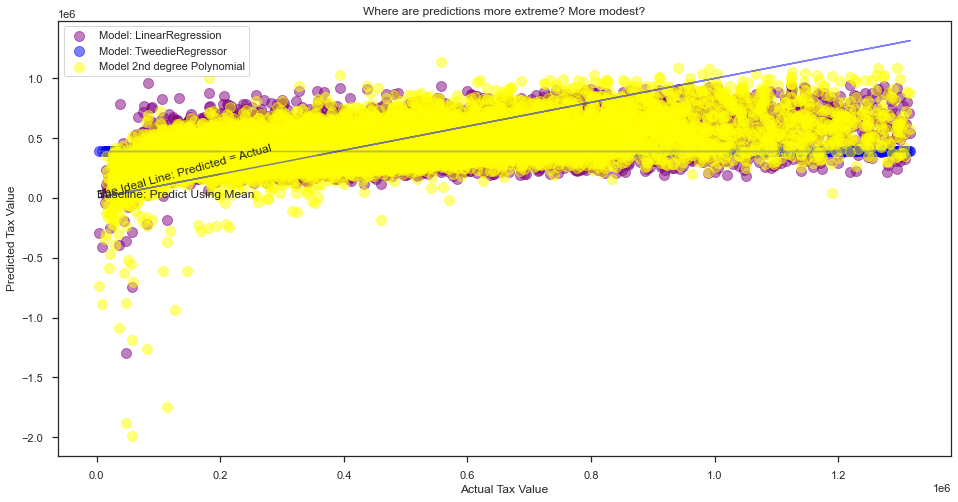

In [126]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.pred_lm, 
            alpha=.5, color="purple", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.pred_glm, 
            alpha=.5, color="blue", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [127]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline_mean)}])



In [128]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)



In [129]:
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lars)}, ignore_index=True)

In [130]:
metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_glm)}, ignore_index=True)

In [131]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm2)}, ignore_index=True)



In [132]:
metric_df   

,model,RMSE_validate,r^2_validate
0,mean_baseline,260371.981338,0.000000
1,OLS Regressor,213554.133920,0.305706
2,Lasso alpha 1,213555.925117,0.305692
3,GLS (Poisson),256297.668893,0.000000
4,Quadratic Model,203419.504889,0.370039


#  <span style="color:orange;"> TEST OLS TAKEAWAY: </span>
- the best model was the polynomial model again with r^2 of 0.37, but i would go with the middle r^2 of 0.30 and use the OLS Regressor and if i had more time play with Qadratic Model seeing that i aiming for regression.

In [133]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_lm'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.pred_lm)**(0.5)

print(f"""
RMSE for OLS Reggessor
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for OLS Reggessor
    
Test/Out-of-Sample Performance: 200650.39789719708



<AxesSubplot:xlabel='parcelid'>

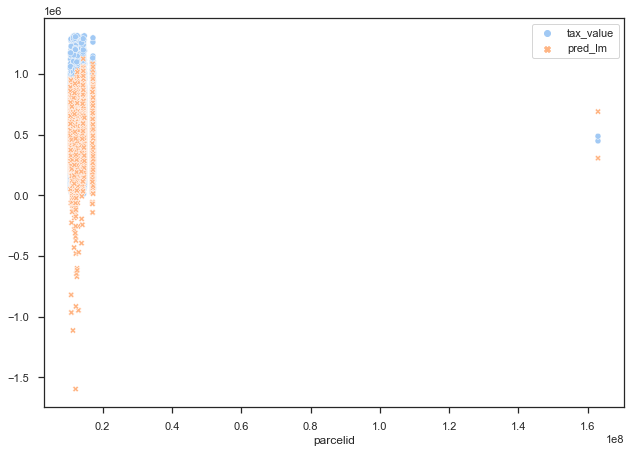

In [134]:
sns.scatterplot(data = y_test)

# <span style="color:orange;"> Conclusion: </span>

## Key movers : County Location, bathrooms and Square Feet

### In reality I could also use our quadratic model, I just feel safer with the companys money using the reggression OLS

#  <span style="color:orange;"> Recommendations: </span>

* look at thing like crime rate, police response time, distance to city center ect...
* cont following bond and interest rates, political climate
* get in contact with realestate agents and survey the thought of people in field. 
* this model will need constant watching so a full time team to work on this project 